In [114]:
import os
import matplotlib as mp
import pandas as pd
import plotly as pt
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px



In [115]:
%matplotlib notebook

In [116]:
#Creat a csv for each date
path_M = os.path.join('Resources/Mike_posts_and_comments.CSV.csv') 
Mike_df = pd.read_csv (path_M)
path_A = os.path.join('Resources/Andres_posts_and_comments.CSV.csv') 
Andres_df = pd.read_csv (path_A)
path_C= os.path.join('Resources/Chey_posts_and_comments.CSV.csv') 
Chey_df = pd.read_csv (path_C)
path_B= os.path.join('Resources/Bruna_posts_and_comments.CSV.csv') 
Bruna_df = pd.read_csv (path_B)


In [117]:
#Filter CSV 
tm_C = Chey_df['reactions/timestamp']
tm_M = Mike_df['Timestamp']
tm_A = Andres_df['reactions/timestamp']
tm_B = Bruna_df['reactions/timestamp']

In [118]:
#Create columns Year, Month, Day, Hour

#Chey
Chey_df['Timestamp'] = pd.to_datetime(tm_C,unit='s', yearfirst=True) 
Chey_df['Year']= Chey_df['Timestamp'].dt.year
Chey_df['Month']= Chey_df['Timestamp'].dt.month
Chey_df['Day']= Chey_df['Timestamp'].dt.day
Chey_df['Hour']= Chey_df['Timestamp'].dt.hour

#Mike
Mike_df['Timestamp'] = pd.to_datetime(tm_M,unit='s', yearfirst=True) 
Mike_df['Year']= Mike_df['Timestamp'].dt.year
Mike_df['Month']= Mike_df['Timestamp'].dt.month
Mike_df['Day']= Mike_df['Timestamp'].dt.day
Mike_df['Hour']= Mike_df['Timestamp'].dt.hour

#Andres
Andres_df['Timestamp'] = pd.to_datetime(tm_A,unit='s', yearfirst=True) 
Andres_df['Year']= Andres_df['Timestamp'].dt.year
Andres_df['Month']= Andres_df['Timestamp'].dt.month
Andres_df['Day']= Andres_df['Timestamp'].dt.day
Andres_df['Hour']= Andres_df['Timestamp'].dt.hour

#Bruna
Bruna_df['Timestamp'] = pd.to_datetime(tm_B, unit ='s', yearfirst=True) 
Bruna_df['Year']= Bruna_df['Timestamp'].dt.year
Bruna_df['Month']= Bruna_df['Timestamp'].dt.month
Bruna_df['Day']= Bruna_df['Timestamp'].dt.day
Bruna_df['Hour']= Bruna_df['Timestamp'].dt.hour



In [119]:
#Clean our Data Frame

#Chey
Chey_df.columns = ['stand', 'Reaction','User','Action','Nan0','Nan','Nan1','Nan3','Timestamp','Year','Month','Day','Hour']
Chey2_df = Chey_df.drop(columns=['stand','Nan0','Nan','Nan1','Nan3'])

#Mike
Mike_df = Mike_df.drop(columns=['Uri'])
Mike2_df = Mike_df.reindex(columns = ['Reaction','User','Action','Timestamp','Year',"Month",'Day','Hour'])

#Andres
Andres_df.columns = ['stand', 'Reaction','User','Action','Nan','Timestamp','Year','Month','Day','Hour']
Andres2_df = Andres_df.drop(columns=['stand','Nan'])

#Bruna
Bruna_df.columns = ['stand', 'Reaction','User','Action','Nan','Timestamp','Year','Month','Day','Hour']
Bruna2_df = Bruna_df.drop(columns=['stand','Nan'])

Andres2_df

,Reaction,User,Action,Timestamp,Year,Month,Day,Hour
0,LOVE,Andres Alcaraz,Andres Alcaraz reacted to Tennis TV's photo.,2021-02-27 01:26:16,2021,2,27,1
1,LIKE,Andres Alcaraz,Andres Alcaraz likes InvÃ­tame a pensar's photo.,2021-02-26 22:46:41,2021,2,26,22
2,LOVE,Andres Alcaraz,Andres Alcaraz reacted to Ena Ovcina's photo.,2021-02-26 22:40:57,2021,2,26,22
3,LIKE,Andres Alcaraz,Andres Alcaraz likes Andrea Olvera's photo.,2021-02-26 21:50:54,2021,2,26,21
4,LIKE,Andres Alcaraz,Andres Alcaraz likes Mitch Escobedo's video.,2021-02-25 16:20:35,2021,2,25,16
...,...,...,...,...,...,...,...,...
7071,LIKE,Andres Alcaraz,Andres Alcaraz likes Vicente Narvaez Castillo'...,2011-05-02 20:26:27,2011,5,2,20
7072,LIKE,Andres Alcaraz,Andres Alcaraz likes Oliverio Ortega's post.,2011-05-01 23:46:32,2011,5,1,23
7073,LIKE,Andres Alcaraz,Andres Alcaraz likes Max Danel's photo.,2011-05-01 23:27:54,2011,5,1,23
7074,LIKE,Andres Alcaraz,Andres Alcaraz likes Vicente Narvaez Castillo'...,2011-04-12 12:27:11,2011,4,12,12


In [120]:
concat_df = pd.concat([Chey2_df,Andres2_df,Mike2_df])
print(concat_df['Reaction'].unique())

['LOVE' 'LIKE' 'HAHA' 'SORRY' 'WOW' 'ANGER']


In [121]:
def reactionToNumber(reaction):
    if reaction == "LIKE":
        return 1
    if reaction == "LOVE":
        return 1
    if reaction == "HAHA":
        return 1
    if reaction == 'SORRY':
        return 1
    if reaction == 'WOW':
        return 1
    if reaction == 'ANGER':
        return 1

In [122]:
concat_df['Reaction to Number']= concat_df['Reaction'].map(reactionToNumber)
Bruna2_df['Reaction to Number']= Bruna2_df['Reaction'].map(reactionToNumber)

In [123]:
group_df = concat_df.drop(columns = ['Reaction','User','Action','Timestamp','Month','Day','Hour'])
group_b_df = Bruna2_df.drop(columns = ['Reaction','User','Action','Timestamp','Month','Day','Hour'])

In [124]:
final_df = group_df.groupby('Year').sum()
final_b_df = group_b_df.groupby('Year').sum()


In [125]:
final_b_df.drop([2021])
final_df.drop([2021])

,Reaction to Number
Year,
2011,795
2012,4082
2013,6097
2014,7896
2015,8178
2016,1520
2017,1758
2018,1212
2019,1343


In [126]:
final_df['Reaction to Number'] = final_df['Reaction to Number']/3


<IPython.core.display.Javascript object>


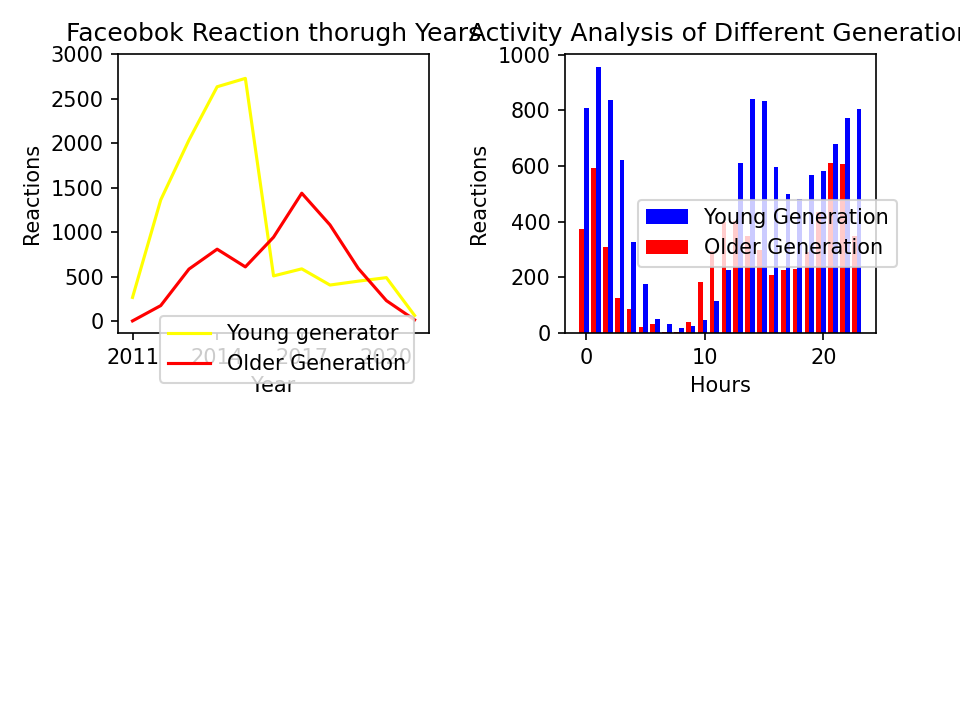

In [127]:
plt.subplot(2,2,1)
plt.plot(final_df.index,final_df['Reaction to Number'], color = 'yellow', label = 'Young generator')
plt.plot(final_b_df.index,final_b_df['Reaction to Number'], color = 'red',label = 'Older Generation')
plt.title("Faceobok Reaction thorugh Years")
plt.xticks(ticks = [2011,2014,2017,2020])
plt.yticks(ticks = [0,500,1000,1500,2000,2500,3000])
plt.ylabel('Reactions')
plt.xlabel('Year')
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))


In [128]:
plt.tight_layout()
plt.show()


In [129]:
stats.ttest_1samp(final_df,final_b_df).pvalue

array([[0.00532539],
       [0.01427665],
       [0.1473419 ],
       [0.4360756 ],
       [0.16813956],
       [0.73092584],
       [0.21595893],
       [0.91139757],
       [0.15455351],
       [0.01976565],
       [0.00569935]])

In [130]:
##### For hour #####

In [131]:
clean = concat_df.drop(columns=['Reaction','User', 'Action','Timestamp','Year','Month','Day'])
bruna_clean = Bruna2_df.drop(columns=['Reaction','User', 'Action','Timestamp','Year','Month','Day'])
bruna_hour_sum = bruna_clean.groupby("Hour").sum()
#####################################################################
hour_sum = clean.groupby("Hour").sum()
hour_sum["Reaction to Number"] = hour_sum["Reaction to Number"]/3


In [132]:
reactions = hour_sum["Reaction to Number"]
hours = hour_sum.index
reacts = bruna_hour_sum["Reaction to Number"]
hrs = hour_sum.index

ax=plt.subplot(2,2,2)
ax.bar(hours, reactions,color ='b',width = 0.4, label = 'Young Generation')
ax.bar(hrs-0.4, reacts,color ='r',width = 0.4, label = 'Older Generation')
ax.set_ylabel('Reactions')
ax.set_xlabel('Hours')
ax.set_title("Activity Analysis of Different Generation")
ax.legend(loc='lower left', bbox_to_anchor=(0.2, 0.2))

In [133]:
plt.tight_layout()
plt.show()


In [134]:
##################### Actions Graph ##################

In [135]:
OnlyLikes =concat_df
photo_rc = OnlyLikes[OnlyLikes['Action'].str.contains('photo')]
video_rc = OnlyLikes[OnlyLikes['Action'].str.contains('video')]
post_rc = OnlyLikes[OnlyLikes['Action'].str.contains('post')]
link_rc = OnlyLikes[OnlyLikes['Action'].str.contains('link')]
comment_rc = OnlyLikes[OnlyLikes['Action'].str.contains('comment')]


In [136]:
photo_rc['Reaction to Number']= photo_rc['Reaction'].map(reactionToNumber)
video_rc['Reaction to Number']= video_rc['Reaction'].map(reactionToNumber)
post_rc['Reaction to Number']= post_rc['Reaction'].map(reactionToNumber)
link_rc['Reaction to Number']= link_rc['Reaction'].map(reactionToNumber)
comment_rc['Reaction to Number']= comment_rc['Reaction'].map(reactionToNumber)


<ipython-input-136-558248067ad5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  photo_rc['Reaction to Number']= photo_rc['Reaction'].map(reactionToNumber)
<ipython-input-136-558248067ad5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_rc['Reaction to Number']= video_rc['Reaction'].map(reactionToNumber)
<ipython-input-136-558248067ad5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [137]:
photo_clean = photo_rc.drop(columns=['Reaction','User', 'Action','Timestamp','Year','Month','Day'])
video_clean = video_rc.drop(columns=['Reaction','User', 'Action','Timestamp','Year','Month','Day'])
post_clean = post_rc.drop(columns=['Reaction','User', 'Action','Timestamp','Year','Month','Day'])
comment_clean = comment_rc.drop(columns=['Reaction','User', 'Action','Timestamp','Year','Month','Day'])
link_clean = link_rc.drop(columns=['Reaction','User', 'Action','Timestamp','Year','Month','Day'])

In [138]:
final_ph = photo_clean.groupby('Hour')
final_v = video_clean.groupby('Hour')
final_pt = post_clean.groupby('Hour')
final_c = comment_clean.groupby('Hour')
final_l = link_clean.groupby('Hour')

In [139]:
# final_ph = final_ph.reset_index()
# final_ph.head()

In [113]:
# plt.subplot(2,2,3)
# plt.scatter(x=final_ph['photo'],y =final_ph['Hour'])
# plt.show()